### 2a. The unit tangent of the curve 
*[Sch40/6]*

a) Find the unit tangent vector to any point on the curve $x = t^2 +1,  y = 4t -3, z = 2t^2 - 6t$.

b) Determine the unit tangent at the point where  $t = 2$

c) Plot the curve and the unit tangent at t = 1.5.

d) Determine the unit tangent on the curve $x=t-t^3/3,  y=t^2 , z =t+t^3/3 $ at the point where  $t = 2.5$. [Sch54/47]

In [1]:
from sympy import *
from sympy.vector import CoordSys3D, Del
x, y, z, t = symbols('x y z t')
C = CoordSys3D('C')                                # Defines a standard coordinate system
r = x*C.i + y*C.j + z*C.k                          # Position vector

================================================================================================

a) Unnormalized tangent vector to the curve at any point is $ d\vec{r}/dt $.

In [2]:
r = (t**2+1)*C.i + (4*t-3)*C.j + (2*t**2-6*t)*C.k  # Parameter presentation of the curve
dr_dt = diff(r, t)                                 # Derivation with respect to the parameter t 
dr_dt                                              # Unnormalized tangent vector of the curve

2*t*C.i + 4*C.j + (4*t - 6)*C.k

b) To get unit tangent $\vec{T}$, the unnormalized tangent $ d\vec{r}/dt $ must be divided by its norm $|d\vec{r}/dt| = \sqrt(d\vec{r}/dt \cdot d\vec{r}/ dt) $.

$$ \vec{T} = \frac{d\vec{r}/dt}{|d\vec{r}/dt|} = \frac{d\vec{r}/dt}{\sqrt(d\vec{r}/dt \cdot d\vec{r}/ dt)}$$

(Note that since 
$|\frac{d\vec{r}}{dt}| = \frac{ds}{dt} $
$$ \vec{T} = \frac{d\vec{r}/dt}{ds/dt} = \frac{d\vec{r}}{ds}, $$
where $ds^2 = dx^2 + dy^2 + dz^2$, is the square of infinitesimal small curve segment, *square of the line element*. )




In [3]:
dr_dt_ev = dr_dt.evalf(subs={t: 2})        # dr/dt with parameter value t=2 
dr_dt_ev                                   # Tangent vector at the point where t=2

4.0*C.i + 4.0*C.j + 2.0*C.k

In [4]:
norm = sqrt(dr_dt.dot(dr_dt))              # Expression for the norm of dr/dt
norm_ev = norm.evalf(subs={t: 2})          # Norm of dr/dt at t=2
norm_ev

6.00000000000000

In [5]:
T0 = dr_dt_ev/norm_ev                      # Unit vector parallel to the tangent at t=2
T0                                         

0.666666666666667*C.i + 0.666666666666667*C.j + 0.333333333333333*C.k

In [6]:
print(T0.dot(T0))                          # Unit vector check 
print(T0.dot(C.i))                         # What is the projection of T0 in direction i

1.00000000000000
0.666666666666667


In [7]:
# look at the contents of the variables 
#dr_dt
#dr_dt_ev
#norm_ev

================================================================================================

c) Plot the curve and the unit tangent at t = 1.5

In [8]:
# c) THE UNIT TANGENT OF THE CURVE at t=1.5
# (The previous code in one block with parameter value t = 1.5)

from sympy import *
from sympy.vector import CoordSys3D
x, y, z, t = symbols('x y z t')
C = CoordSys3D('C')                 
r = x*C.i + y*C.j + z*C.k           

# INPUT
# Parameter presentation of the curve:
r = (t**2+1)*C.i + (4*t-3)*C.j + (2*t**2-6*t)*C.k 
# Parameter value:
t0 = 1.5

# CALCULATE
dr_dt = diff(r, t)  
dr_dt              
dr_dt_ev = dr_dt.evalf(subs={t: t0})
norm = sqrt(dr_dt.dot(dr_dt))       
norm_ev = norm.evalf(subs={t: t0})   
T0 = dr_dt_ev/norm_ev  

# OUTPUT
print('The unit tangent of the curve', r, ' at parameter value t=', t0, 'is')
T0                     

The unit tangent of the curve (t**2 + 1)*C.i + (4*t - 3)*C.j + (2*t**2 - 6*t)*C.k  at parameter value t= 1.5 is


0.6*C.i + 0.8*C.j + (1.89091402092252e-125)*C.k

In [9]:
# PLOTTING
import numpy as np
import matplotlib.pyplot as plt

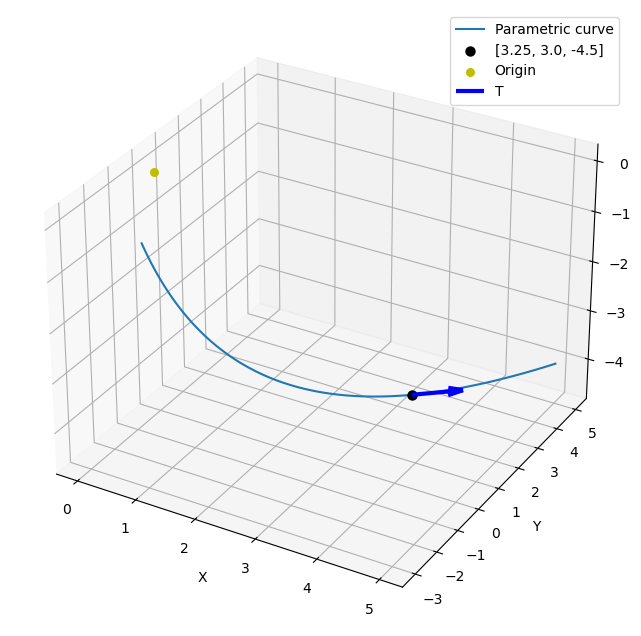

The point on the curve at the parameter value t= 1.5 is P = [3.25, 3.0, -4.5]


In [10]:
plt.rcParams["figure.figsize"] = (10,8)
ax = plt.figure().add_subplot(projection='3d')

# Axis limitations (if needed) 
#ax.set_xlim3d([-2.5, 2.5])        
#ax.set_ylim3d([-2.5, 2.5])
#ax.set_zlim3d([-2, 1])

# Axis markings
ax.set_xlabel('X')                 
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Curve plotting
t0 = 1.5
t = np.linspace(0, 2, 100)                                # Parameter range, spacing
P = [t**2+1, 4*t-3, 2*t**2-6*t]                           # Calculate curve points: FROM INPUT!
ax.plot(P[0], P[1], P[2], label='Parametric curve')       # Plot

# Fixed point on the curve where parameter t = t0
t = t0          # Fixed parameter value given in input.
P = [round(t**2+1, 2), 4*t-3, round(2*t**2-6*t,2)]        # Fixed point on the curve: FROM INPUT!
ax.scatter(P[0], P[1], P[2], color='k', linewidths=3, label = P)    # Plot fixed point
ax.scatter(0,0,0, color='y', linewidths=2, label = 'Origin')        # Plot Origin

# Extract scalar components from tangent vector T0
P1 = C.origin.locate_new('P1', T0)
V1 = list(P1.express_coordinates(C))

# Plot Unit tangent vector (start point, end point)
quiver0 = ax.quiver(P[0], P[1], P[2],  V1[0],V1[1],V1[2],  color='b', linewidths=3, label = 'T')
ax.legend()
plt.show()

print('The point on the curve at the parameter value t=', t0, 'is P =', P)
plt.show()

==============================================================================================

d) Determine the unit tangent on the curve $x=t-t^3/3,  y=t^2 , z =t+t^3/3 $ at the point where  $t = 2.5$. [Sch54/47]

In [11]:
# d) Now we are using SymPy Matrix representation for the vector.
t = symbols('t')
r = Matrix([t-t**3/3, t**2, t+t**3/3])
r

Matrix([
[-t**3/3 + t],
[       t**2],
[ t**3/3 + t]])

In [12]:
dr_dt = diff(r,t)
dr_dt                             # Unnormalized tangent vector 

Matrix([
[1 - t**2],
[     2*t],
[t**2 + 1]])

In [13]:
T = dr_dt/dr_dt.norm()            # Normalized tangent vector 
T

Matrix([
[(1 - t**2)/sqrt(4*Abs(t)**2 + Abs(t**2 - 1)**2 + Abs(t**2 + 1)**2)],
[       2*t/sqrt(4*Abs(t)**2 + Abs(t**2 - 1)**2 + Abs(t**2 + 1)**2)],
[(t**2 + 1)/sqrt(4*Abs(t)**2 + Abs(t**2 - 1)**2 + Abs(t**2 + 1)**2)]])

In [14]:
T1 = T.evalf(subs={t: 2.5})       # Normalized tangent at t = 2.5
T1

Matrix([
[-0.512042841548879],
[ 0.487659849094171],
[ 0.707106781186548]])

In [15]:
# Round matrix elements of T1 to 3 digits
from functools import partial
round3 = partial(round, ndigits=3)
T1 = T1.applyfunc(round3)
print('The unit tangent at t = 2.5 is')
T1


The unit tangent at t = 2.5 is


Matrix([
[-0.512],
[ 0.488],
[ 0.707]])

In [16]:
# Unity check
T1.dot(T1)

1.00